In [1]:
import pandas as pd

In [2]:
# 数据参数初始化
datafile = 'E:\\NLP\\Python数据分析与挖掘实战\\chapter5\\demo\\data\\arima_data.xls'
# 预测数
forecastnum = 5

In [3]:
# 读取数据，指定日期列为指标，Pandas会自动将‘日期’列识别为 Datetime 模式
data = pd.read_excel(datafile, index_col = '日期')
# 读取5行看看效果
print(data[:5])

              销量
日期              
2015-01-01  3023
2015-01-02  3039
2015-01-03  3056
2015-01-04  3138
2015-01-05  3188


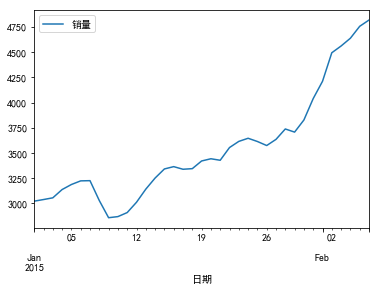

In [4]:
# 时序图
import matplotlib.pyplot as plt
# 正常显示中文标签, 设置 FangSong/黑体
plt.rcParams['font.sans-serif'] = [u'SimHei']
# 解决 负号 的显示问题
plt.rcParams['axes.unicode_minus'] = False
# 绘制
data.plot()
# 显示
plt.show()

C:\Users\Just Do It\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
C:\Users\Just Do It\Anaconda3\lib\site-packages\matplotlib\figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


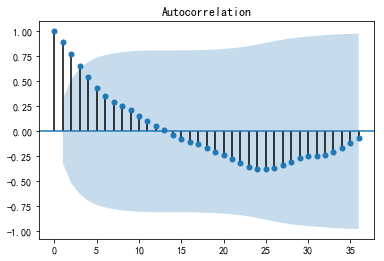

In [5]:
# 自相关图
# 使用 statsmodels 在 p27
from statsmodels.graphics.tsaplots import plot_acf
from pandas.core import datetools
plot_acf(data).show()
plt.show()

### ADF检验可以得到单位根检验统计量对应的p值，若此值显著大于0.05，则该序列非平稳

In [6]:
# 平稳性检测
from statsmodels.tsa.stattools import adfuller as ADF
# 返回值 adf，pvalue, usedlag, nobs, critical values, icbest, regresults, resstore
print('原始序列的ADF检验结果为： ', ADF(data['销量']))

原始序列的ADF检验结果为：  (1.8137710150945274, 0.99837594215142644, 10, 26, {'1%': -3.7112123008648155, '5%': -2.9812468047337282, '10%': -2.6300945562130176}, 299.46989866024177)


### 对原始序列进行一阶(或者多阶)差分，再次进行平稳性和白噪声检验

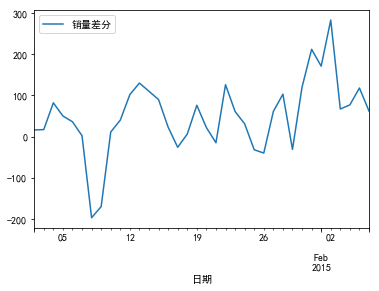

In [18]:
# 1阶差分，调整periods可以调整差分阶数
D_data = data.diff(periods = 1, axis = 0).dropna()
# 差分后的结果
D_data.columns = ['销量差分']
# 时序图
D_data.plot()
plt.show()

C:\Users\Just Do It\Anaconda3\lib\site-packages\matplotlib\figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


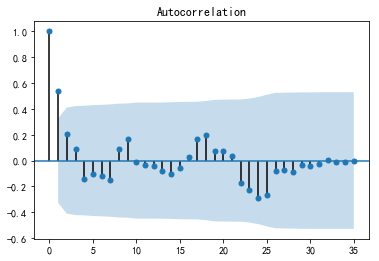

In [9]:
# 自相关图
plot_acf(D_data).show()
plt.show()

C:\Users\Just Do It\Anaconda3\lib\site-packages\matplotlib\figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


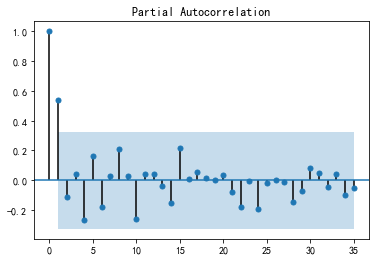

In [13]:
# 偏自相关图
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(D_data).show()
plt.show()

### ADF检验可以得到单位根检验统计量对应的p值，若此值显著大于0.05，则该序列非平稳

In [19]:
# 平稳性检测
# 返回值 adf，pvalue, usedlag, nobs, critical values, icbest, regresults, resstore
print('差分序列的ADF检验结果为: ', ADF(D_data['销量差分']))

差分序列的ADF检验结果为:  (-3.1560562366723532, 0.022673435440048861, 0, 35, {'1%': -3.6327426647230316, '5%': -2.9485102040816327, '10%': -2.6130173469387756}, 287.59090907803341)


In [21]:
# 白噪声检验
from statsmodels.stats.diagnostic import acorr_ljungbox
# 返回统计量和p值
print('差分序列的白噪声检验结果： ', acorr_ljungbox(D_data, lags = 1))

差分序列的白噪声检验结果：  (array([ 11.30402222]), array([ 0.00077339]))


### 如果差分后的序列不平稳，则修改差分阶数重新差分，或者继续对序列进行差分运算，运算后继续进行平稳性和白噪声检验，直至差分后的序列平稳为止

### 若差分运算后的序列平稳，则对差分后的平稳序列拟合ARMA模型，并且为模型定阶

In [23]:
from statsmodels.tsa.arima_model import ARIMA
data['销量'] = data['销量'].astype(float)

In [25]:
# 定阶
# 一般阶数不超过 length / 10
pmax = int(len(D_data) / 10)
qmax = int(len(D_data) / 10)
# bic 矩阵
bic_matrix = []
for p in range(pmax + 1):
    tmp = []
    for q in range(qmax + 1):
        # 有部分报错情况，使用try跳过
        try:
            tmp.append(ARIMA(data, (p, 1, q)).fit().bic)
        except Exception as e:
            print(e, '--')
            tmp.append(None)
    bic_matrix.append(tmp)

C:\Users\Just Do It\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Just Do It\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:654: RuntimeWarning: divide by zero encountered in true_divide
  invmacoefs = -np.log((1-macoefs)/(1+macoefs))
C:\Users\Just Do It\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:628: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\Just Do It\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:629: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\Just Do It\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:654: RuntimeWarning: divide by zero encountered in log
  invmacoefs = -np.log((1-macoefs)/(1+macoefs))
C:\Users\Just Do It\Anacon

SVD did not converge --
The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params. --


C:\Users\Just Do It\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:584: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/
C:\Users\Just Do It\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:585: RuntimeWarning: overflow encountered in exp
  (1+np.exp(-params))).copy()
C:\Users\Just Do It\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:585: RuntimeWarning: invalid value encountered in true_divide
  (1+np.exp(-params))).copy()
C:\Users\Just Do It\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:586: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/
C:\Users\Just Do It\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:587: RuntimeWarning: overflow encountered in exp
  (1+np.exp(-params))).copy()
C:\Users\Just Do It\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:587: RuntimeWarning: invalid value encountered in true_divide
  (1+np.exp(-params))).copy()
C:\Users\Just Do It\Anaconda3\lib\site

SVD did not converge --
SVD did not converge --
SVD did not converge --


In [27]:
# 从中找出最小值
bic_matrix = pd.DataFrame(bic_matrix)
print(bic_matrix, '___1')
print(bic_matrix.stack(), '___2')
# 先用stack展平，然后用idxmain找出最小值位置
p, q = bic_matrix.stack().idxmin()
print('BIC最小的p值和q值为: %s, %s' %(p, q))

            0           1           2           3
0  432.068472  422.510082  426.088911  426.595507
1  423.628276  426.073601         NaN         NaN
2  426.774824  427.395840         NaN  433.490100
3  430.317524         NaN         NaN  436.478109 ___1
0  0    432.068472
   1    422.510082
   2    426.088911
   3    426.595507
1  0    423.628276
   1    426.073601
2  0    426.774824
   1    427.395840
   3    433.490100
3  0    430.317524
   3    436.478109
dtype: float64 ___2
BIC最小的p值和q值为: 0, 1


In [28]:
# 建立 ARIMA(0, 1, 1)模型
model = ARIMA(data, (p, 1, q)).fit()
# 给出一份模型报告
model.summary2()
# 作为期 5 天的预测，返回预测结果，标准误差，置信区间
model.for ecast(5)

(array([ 4873.9665477 ,  4923.92261622,  4973.87868474,  5023.83475326,
         5073.79082178]),
 array([  73.08574262,  142.32680643,  187.54283213,  223.80283273,
         254.95705912]),
 array([[ 4730.72112437,  5017.21197102],
        [ 4644.96720157,  5202.87803086],
        [ 4606.3014882 ,  5341.45588128],
        [ 4585.18926146,  5462.48024505],
        [ 4574.0841683 ,  5573.49747526]]))